# ARIMA Analysis  and Predictions 

# Stock -1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Datasets/M&M.NS.csv')

In [3]:
df

Date         Open         High          Low        Close  \
0    2023-03-29  1133.949951  1152.449951  1132.000000  1144.300049   
1    2023-03-31  1147.599976  1163.000000  1145.849976  1158.699951   
2    2023-04-03  1161.300049  1180.000000  1155.300049  1169.900024   
3    2023-04-05  1172.000000  1173.300049  1151.949951  1155.449951   
4    2023-04-06  1154.000000  1175.000000  1148.300049  1171.250000   
..          ...          ...          ...          ...          ...   
240  2024-03-21  1859.949951  1875.000000  1845.000000  1865.849976   
241  2024-03-22  1865.849976  1905.449951  1847.250000  1878.800049   
242  2024-03-26  1878.199951  1917.500000  1861.099976  1863.949951   
243  2024-03-27  1869.900024  1899.900024  1855.300049  1881.150024   
244  2024-03-28  1881.150024  1962.949951  1870.349976  1921.349976   

       Adj Close   Volume  
0    1132.432739  4003003  
1    1146.683350  2343070  
2    1157.767212  2546562  
3    1143.467041  2028469  
4    1159.103271  2029418  
..           ...      ...  
240  1865.849976  2072960  
241  1878.800049  3786990  
242  1863.949951  4092744  
243  1881.150024  4196597  
244  1921.349976  3790854  

[245 rows x 7 columns]

# Preliminary Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [5]:
df.isnull().sum().to_frame()


0
Open       0
High       0
Low        0
Close      0
Adj Close  0
Volume     0

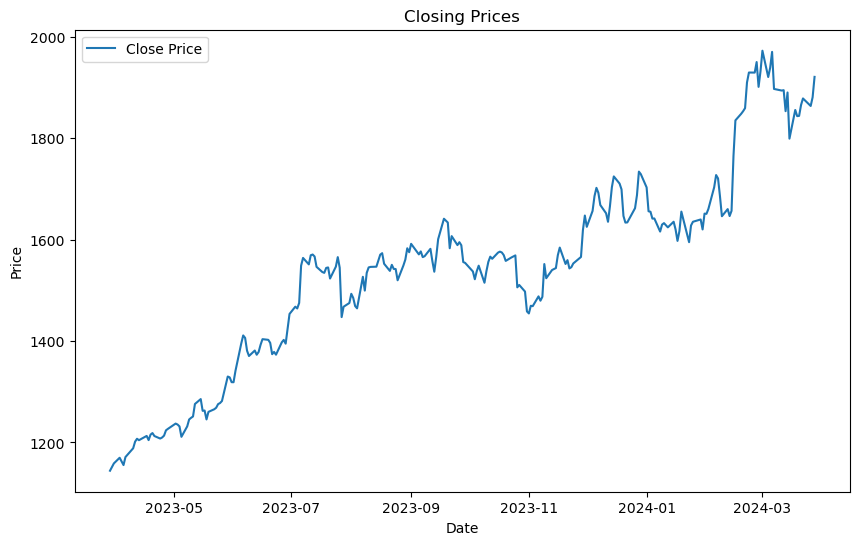

In [6]:
# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Test For Stationary

# Augmented Dickey-Fuller (ADF)

In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['Close'])

# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -1.157344894897841
p-value: 0.6916706288990176
Critical Values:
   1%: -3.457437824930831
   5%: -2.873459364726563
   10%: -2.573122099570008


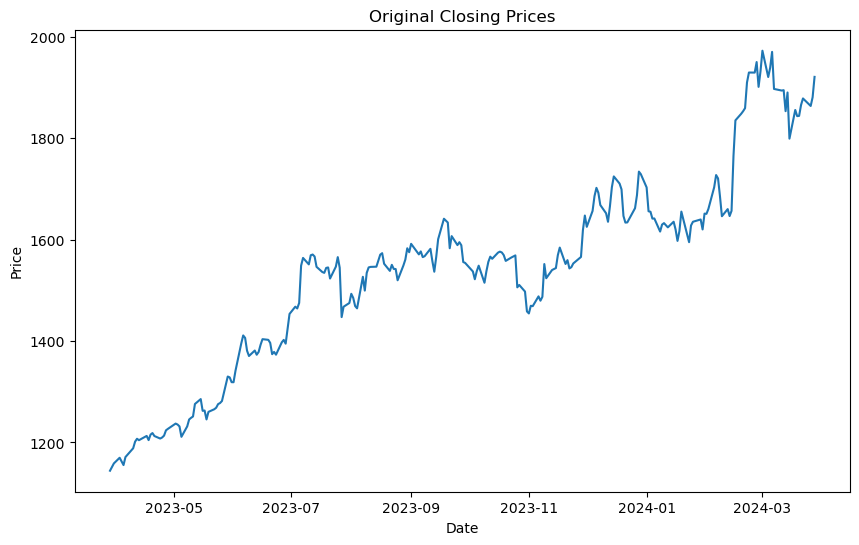

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Original Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


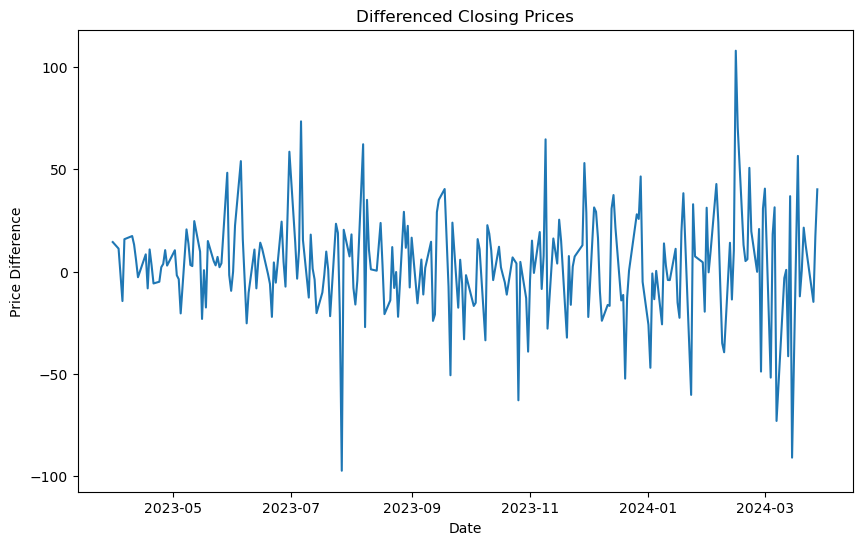

In [9]:

# Perform differencing to make the data stationary
df['Close_diff'] = df['Close'].diff()
df.dropna(inplace=True)

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(df['Close_diff'])
plt.title('Differenced Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()


In [10]:
df.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-03-31  1147.599976  1163.000000  1145.849976  1158.699951  1146.683350   
2023-04-03  1161.300049  1180.000000  1155.300049  1169.900024  1157.767212   
2023-04-05  1172.000000  1173.300049  1151.949951  1155.449951  1143.467041   
2023-04-06  1154.000000  1175.000000  1148.300049  1171.250000  1159.103271   
2023-04-10  1171.250000  1191.000000  1171.250000  1188.599976  1176.273193   

             Volume  Close_diff  
Date                             
2023-03-31  2343070   14.399902  
2023-04-03  2546562   11.200073  
2023-04-05  2028469  -14.450073  
2023-04-06  2029418   15.800049  
2023-04-10  2586918   17.349976

In [11]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on the differenced data
result_diff = adfuller(df['Close_diff'])

# Extract and print test results
print('ADF Statistic (Differenced Data):', result_diff[0])
print('p-value (Differenced Data):', result_diff[1])


ADF Statistic (Differenced Data): -15.633930878725405
p-value (Differenced Data): 1.6721008365766107e-28


`Thus, the differenced data is stationary based on the Augmented Dickey-Fuller (ADF) test.`

# ACF

<Figure size 1000x600 with 0 Axes>

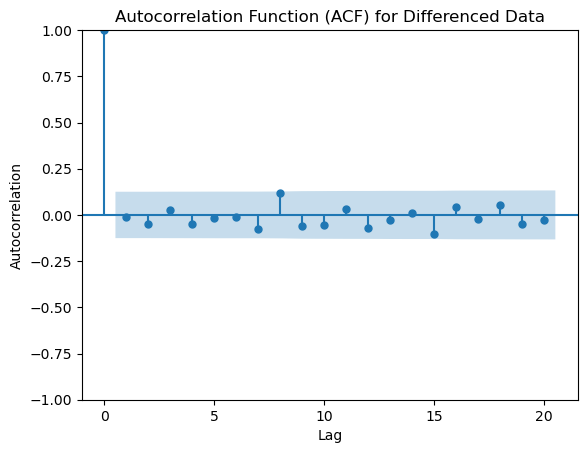

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF) for the differenced data
plt.figure(figsize=(10, 6))
plot_acf(df['Close_diff'], lags=20, alpha=0.05)
plt.title('Autocorrelation Function (ACF) for Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


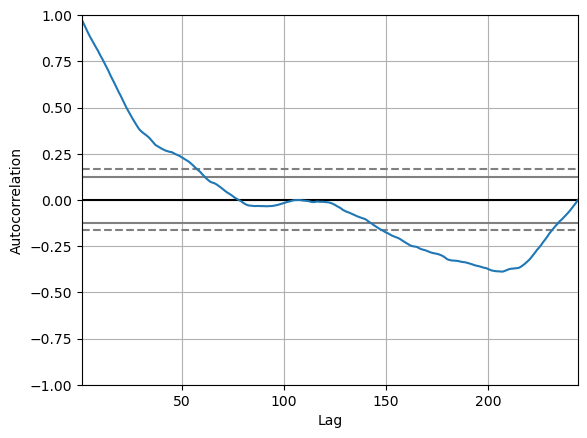

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

# PACF Plot

<Figure size 1200x600 with 0 Axes>

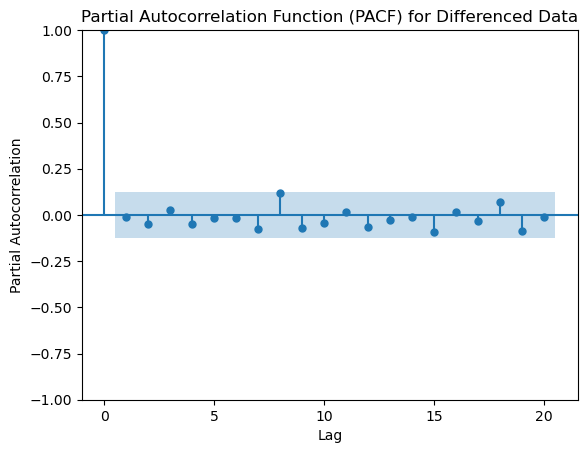

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['Close_diff'], lags=20, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) for Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Arima Model

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Close'], order=(1, 0, 1))
model_fit = model.fit()


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  244
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1141.465
Date:                Sat, 11 May 2024   AIC                           2290.930
Time:                        12:52:39   BIC                           2304.919
Sample:                             0   HQIC                          2296.564
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1545.0190    232.616      6.642      0.000    1089.101    2000.937
ar.L1          0.9964      0.008    129.649      0.000       0.981       1.012
ma.L1          0.0054      0.053      0.103      0.9

# Forecasting

In [18]:
forecast = model_fit.get_forecast(steps=30)

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
forecast

In [20]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['Close'], order=(1, 0, 1))  # Replace 'Close' with your column name
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)



C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

In [21]:
# Drop NaN values from the test set and forecasted series
test = test.dropna()
test_forecast_series = test_forecast_series.dropna()

print("Length of true values:", len(test['Open']))
print("Length of forecasted values:", len(test_forecast_series))


Length of true values: 49
Length of forecasted values: 0


In [22]:
# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [23]:
test_forecast_series.head().to_frame()

predicted_mean
Date                      
2024-01-16             NaN
2024-01-17             NaN
2024-01-18             NaN
2024-01-19             NaN
2024-01-23             NaN

In [24]:
# Calculate the mean value of the forecasted series
mean_value = df['Close'].mean()

# Fill NaN values with the mean value
test_forecast_series = test_forecast_series.fillna(mean_value)


In [25]:
test_forecast_series.head().to_frame()

predicted_mean
Date                      
2024-01-16     1545.020696
2024-01-17     1545.020696
2024-01-18     1545.020696
2024-01-19     1545.020696
2024-01-23     1545.020696

In [26]:
# Calculate the mean squared error
mse = mean_squared_error(test['Open'], test_forecast_series[:len(test)])  # Use the length of the test set
rmse = mse**0.5

# Print RMSE
print('RMSE:', rmse)


RMSE: 270.8759325275825


# Plot with Prediction

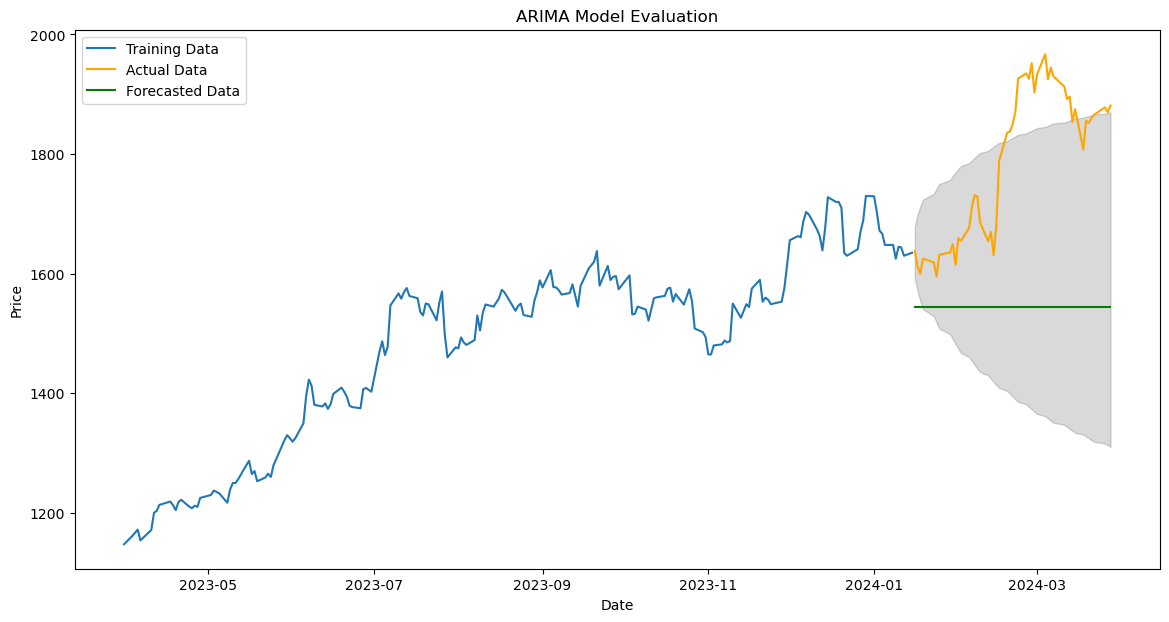

RMSE: 270.8759325275825


In [27]:

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['Open'], label='Training Data')  # Replace 'Close' with your column name
plt.plot(test['Open'], label='Actual Data', color='orange')  # Replace 'Close' with your column name
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print('RMSE:', rmse)

# Residual Plot 

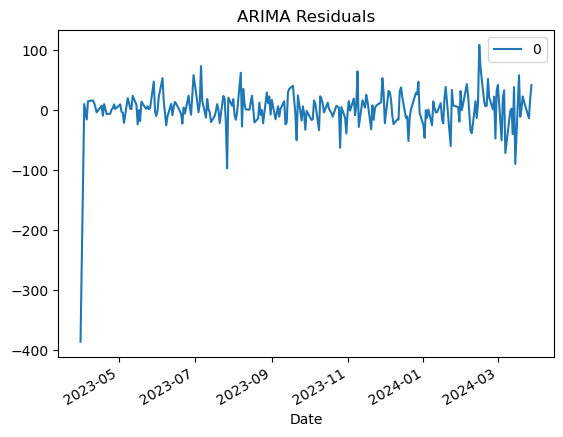

In [28]:

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA Residuals')
plt.show()

# Stock -2

In [29]:
sbi_df = pd.read_csv('Datasets/SBIN.NS.csv')

In [30]:
sbi_df

Date        Open        High         Low       Close   Adj Close  \
0    2023-03-29  509.000000  518.000000  506.299988  516.500000  506.654419   
1    2023-03-31  520.650024  524.900024  519.349976  523.750000  513.766235   
2    2023-04-03  524.750000  528.500000  522.099976  526.750000  516.709045   
3    2023-04-05  527.000000  527.599976  519.049988  523.000000  513.030518   
4    2023-04-06  524.000000  533.700012  521.650024  527.650024  517.591919   
..          ...         ...         ...         ...         ...         ...   
240  2024-03-21  742.000000  750.599976  740.549988  744.299988  744.299988   
241  2024-03-22  743.849976  748.799988  741.400024  746.700012  746.700012   
242  2024-03-26  743.049988  747.849976  738.500000  740.049988  740.049988   
243  2024-03-27  743.000000  745.849976  730.200012  733.299988  733.299988   
244  2024-03-28  737.750000  759.549988  736.900024  752.349976  752.349976   

       Volume  
0    24203789  
1    17356345  
2    14210949  
3    13574801  
4    25125879  
..        ...  
240  15161161  
241  15535921  
242  14678342  
243  30088789  
244  21705116  

[245 rows x 7 columns]

# Preliminary Analysis

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

sbi_df['Date'] = pd.to_datetime(sbi_df['Date'])
sbi_df.set_index('Date', inplace=True)


In [32]:
sbi_df.isnull().sum().to_frame()


0
Open       0
High       0
Low        0
Close      0
Adj Close  0
Volume     0

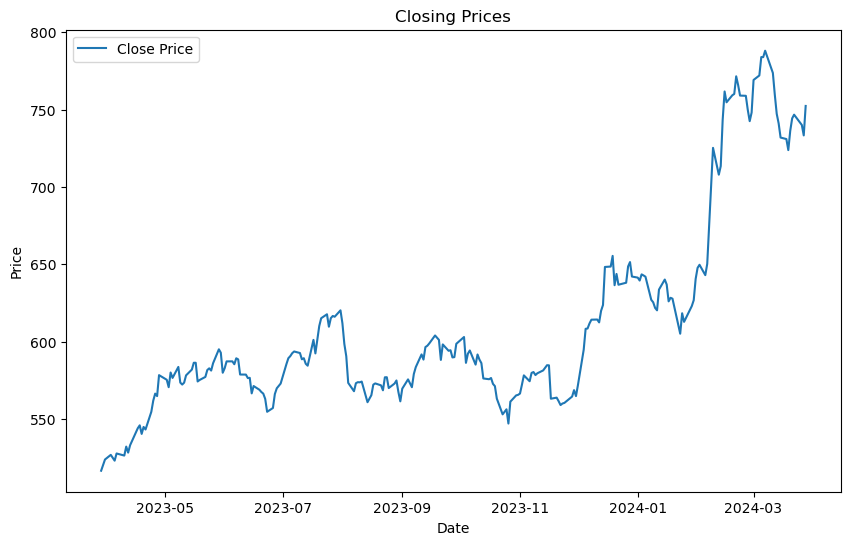

In [33]:
# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(sbi_df['Close'], label='Close Price')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Test For Stationary

# Augmented Dickey-Fuller (ADF)


In [34]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(sbi_df['Close'])

# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -0.39195539240470406
p-value: 0.9114332988961757
Critical Values:
   1%: -3.4575505077947746
   5%: -2.8735087323013526
   10%: -2.573148434859185


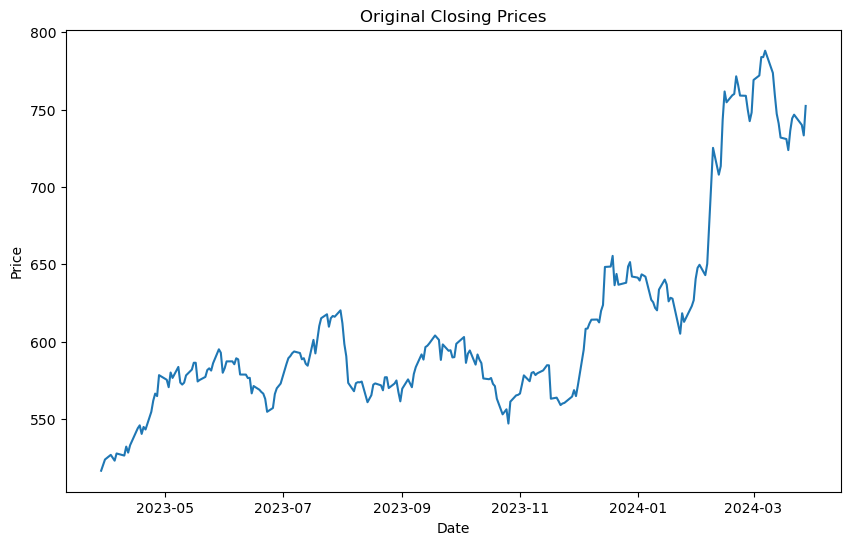

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(sbi_df['Close'])
plt.title('Original Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


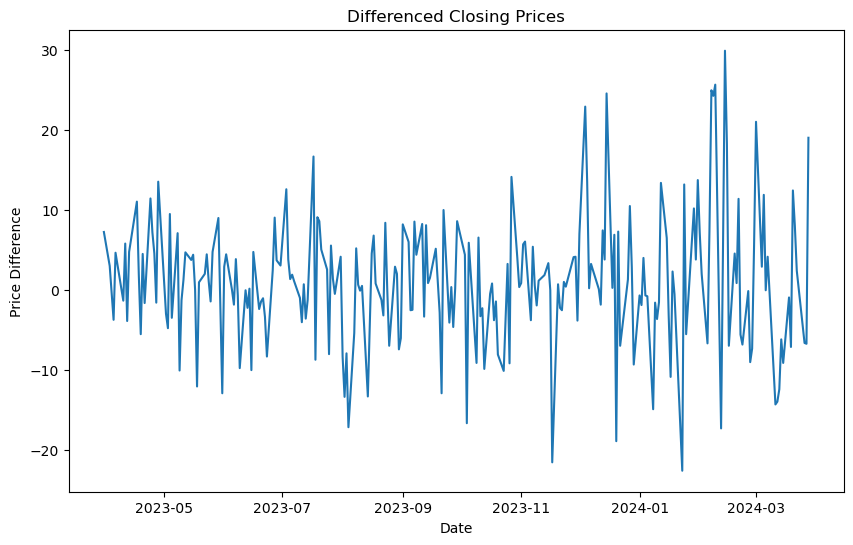

In [36]:

# Perform differencing to make the data stationary
sbi_df['Close_diff'] = sbi_df['Close'].diff()
sbi_df.dropna(inplace=True)

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(sbi_df['Close_diff'])
plt.title('Differenced Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()


In [37]:
sbi_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-31  520.650024  524.900024  519.349976  523.750000  513.766235   
2023-04-03  524.750000  528.500000  522.099976  526.750000  516.709045   
2023-04-05  527.000000  527.599976  519.049988  523.000000  513.030518   
2023-04-06  524.000000  533.700012  521.650024  527.650024  517.591919   
2023-04-10  529.250000  530.400024  524.400024  526.299988  516.267578   

              Volume  Close_diff  
Date                              
2023-03-31  17356345    7.250000  
2023-04-03  14210949    3.000000  
2023-04-05  13574801   -3.750000  
2023-04-06  25125879    4.650024  
2023-04-10  17335453   -1.350036

In [38]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on the differenced data
result_diff = adfuller(sbi_df['Close_diff'])

# Extract and print test results
print('ADF Statistic (Differenced Data):', result_diff[0])
print('p-value (Differenced Data):', result_diff[1])


ADF Statistic (Differenced Data): -13.763027190647046
p-value (Differenced Data): 1.0002787161104929e-25


`Thus, the differenced data is stationary based on the Augmented Dickey-Fuller (ADF) test.`

# ACF

<Figure size 1000x600 with 0 Axes>

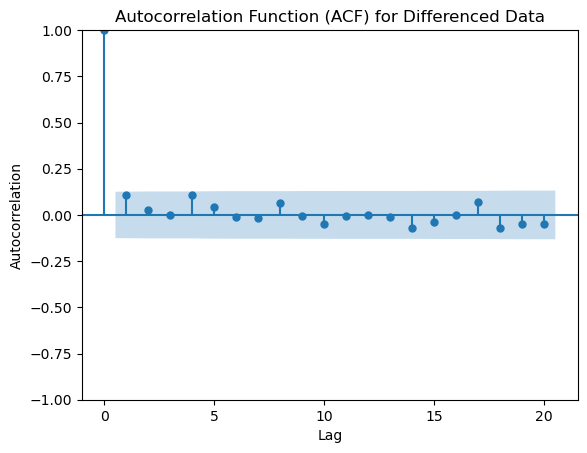

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF) for the differenced data
plt.figure(figsize=(10, 6))
plot_acf(sbi_df['Close_diff'], lags=20, alpha=0.05)
plt.title('Autocorrelation Function (ACF) for Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


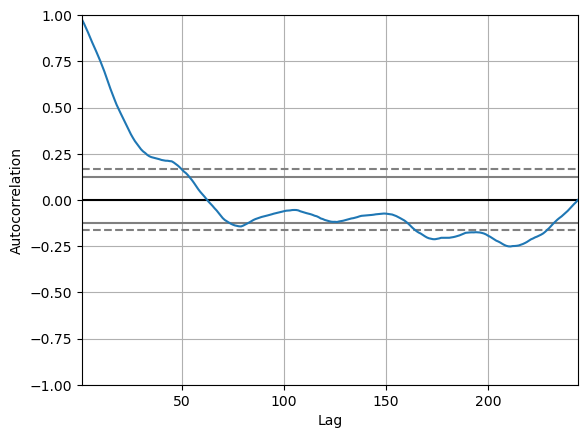

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sbi_df['Close'])
plt.show()

# PACF Plot

<Figure size 1200x600 with 0 Axes>

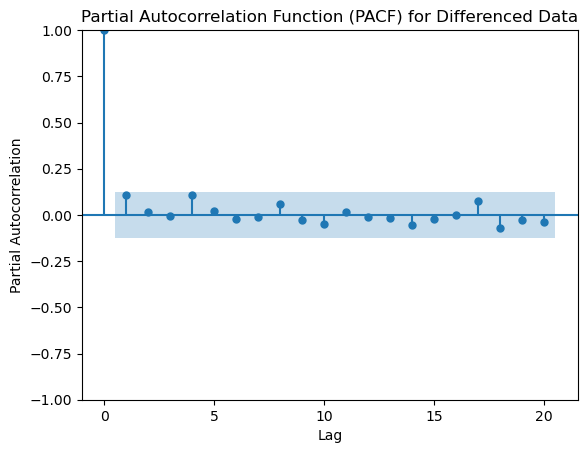

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(sbi_df['Close_diff'], lags=20, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) for Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Arima Model

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(sbi_df['Close'], order=(1, 0, 1))
model_fit = model.fit()


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [43]:

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  244
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -860.435
Date:                Sat, 11 May 2024   AIC                           1728.870
Time:                        12:53:01   BIC                           1742.859
Sample:                             0   HQIC                          1734.504
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        610.9924     80.618      7.579      0.000     452.984     769.001
ar.L1          0.9952      0.009    109.353      0.000       0.977       1.013
ma.L1          0.1152      0.056      2.057      0.0

# Forecasting

In [44]:
forecast = model_fit.get_forecast(steps=30)

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [45]:
forecast

In [46]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(sbi_df) * 0.8)
train, test = sbi_df[0:train_size], sbi_df[train_size:len(sbi_df)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['Close'], order=(1, 0, 1))  # Replace 'Close' with your column name
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)



C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

In [47]:
# Drop NaN values from the test set and forecasted series
test = test.dropna()
test_forecast_series = test_forecast_series.dropna()

print("Length of true values:", len(test['Open']))
print("Length of forecasted values:", len(test_forecast_series))


Length of true values: 49
Length of forecasted values: 0


In [48]:
# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [49]:
test_forecast_series.head().to_frame()

predicted_mean
Date                      
2024-01-16             NaN
2024-01-17             NaN
2024-01-18             NaN
2024-01-19             NaN
2024-01-23             NaN

In [50]:
# Calculate the mean value of the forecasted series
mean_value = sbi_df['Close'].mean()

# Fill NaN values with the mean value
test_forecast_series = test_forecast_series.fillna(mean_value)


In [51]:
test_forecast_series.head().to_frame()

predicted_mean
Date                      
2024-01-16      610.861476
2024-01-17      610.861476
2024-01-18      610.861476
2024-01-19      610.861476
2024-01-23      610.861476

In [52]:
# Calculate the mean squared error
mse = mean_squared_error(test['Open'], test_forecast_series[:len(test)])  # Use the length of the test set
rmse = mse**0.5

# Print RMSE
print('RMSE:', rmse)



RMSE: 116.821875662352


# Plot with Prediction

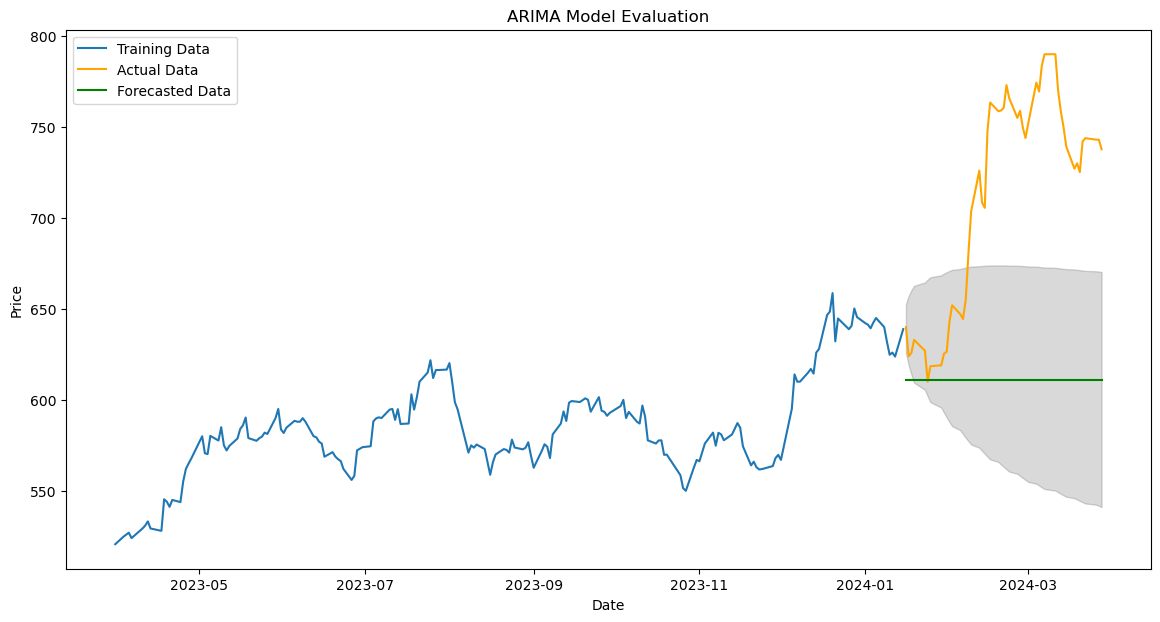

RMSE: 116.821875662352


In [53]:

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['Open'], label='Training Data')  # Replace 'Close' with your column name
plt.plot(test['Open'], label='Actual Data', color='orange')  # Replace 'Close' with your column name
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print('RMSE:', rmse)

# Residual Plot 

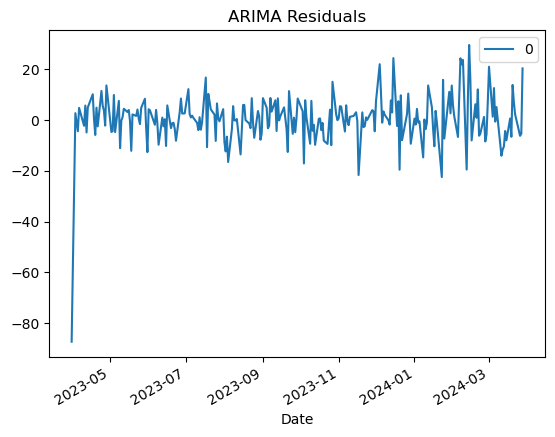

In [54]:

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA Residuals')
plt.show()

# Stock -3

In [55]:
tcs_df = pd.read_csv('Datasets/TCS.NS.csv')

In [56]:
tcs_df

Date         Open         High          Low        Close  \
0    2023-03-29  3129.000000  3150.000000  3104.100098  3138.899902   
1    2023-03-31  3189.949951  3213.000000  3152.000000  3205.899902   
2    2023-04-03  3224.949951  3224.949951  3173.750000  3200.000000   
3    2023-04-05  3185.500000  3264.350098  3185.500000  3239.800049   
4    2023-04-06  3225.000000  3257.350098  3215.000000  3220.699951   
..          ...          ...          ...          ...          ...   
240  2024-03-21  3990.050049  4008.399902  3948.000000  3972.949951   
241  2024-03-22  3897.000000  3938.000000  3855.000000  3910.899902   
242  2024-03-26  3875.000000  3946.699951  3871.449951  3877.500000   
243  2024-03-27  3888.500000  3895.000000  3829.399902  3840.899902   
244  2024-03-28  3850.100098  3915.000000  3840.500000  3876.300049   

       Adj Close   Volume  
0    3085.330078  1740616  
1    3151.186768  2382581  
2    3145.387451  1521830  
3    3184.508057  2655065  
4    3165.733887  1703464  
..           ...      ...  
240  3972.949951  3829582  
241  3910.899902  5852485  
242  3877.500000  3440925  
243  3840.899902  1968575  
244  3876.300049  4311783  

[245 rows x 7 columns]

# Preliminary Analysis

In [57]:
tcs_df.isnull().sum().to_frame()

0
Date       0
Open       0
High       0
Low        0
Close      0
Adj Close  0
Volume     0

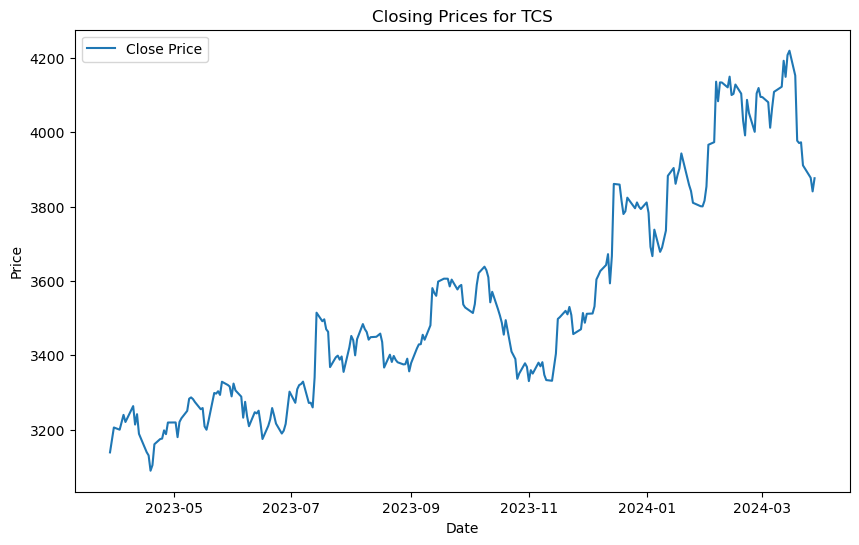

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
tcs_df['Date'] = pd.to_datetime(tcs_df['Date'])
tcs_df.set_index('Date', inplace=True)

# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(tcs_df['Close'], label='Close Price')
plt.title('Closing Prices for TCS')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Test For Stationary

In [59]:

from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result_tcs = adfuller(tcs_df['Close'])

# Extract and print test results
print('ADF Statistic (TCS):', result_tcs[0])
print('p-value (TCS):', result_tcs[1])
print('Critical Values (TCS):')
for key, value in result_tcs[4].items():
    print(f'   {key}: {value}')


ADF Statistic (TCS): -1.3006893190404258
p-value (TCS): 0.6288568904013377
Critical Values (TCS):
   1%: -3.457437824930831
   5%: -2.873459364726563
   10%: -2.573122099570008


In [60]:

# Perform differencing to make the data stationary
tcs_df['Close_diff'] = tcs_df['Close'].diff()
tcs_df.dropna(inplace=True)


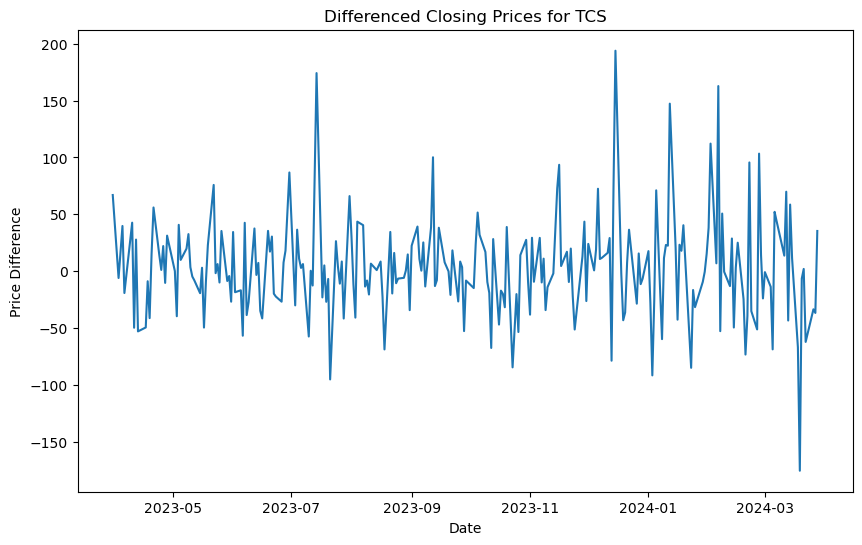

In [61]:

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(tcs_df['Close_diff'])
plt.title('Differenced Closing Prices for TCS')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()

In [62]:

# Perform Augmented Dickey-Fuller test on the differenced data
result_diff_tcs = adfuller(tcs_df['Close_diff'])


In [63]:


# Extract and print test results
print('ADF Statistic (Differenced Data - TCS):', result_diff_tcs[0])
print('p-value (Differenced Data - TCS):', result_diff_tcs[1])


ADF Statistic (Differenced Data - TCS): -15.244624249349709
p-value (Differenced Data - TCS): 5.106803288246802e-28


`Thus, the differenced data is stationary based on the Augmented Dickey-Fuller (ADF) test.`

# ACF

<Figure size 1000x600 with 0 Axes>

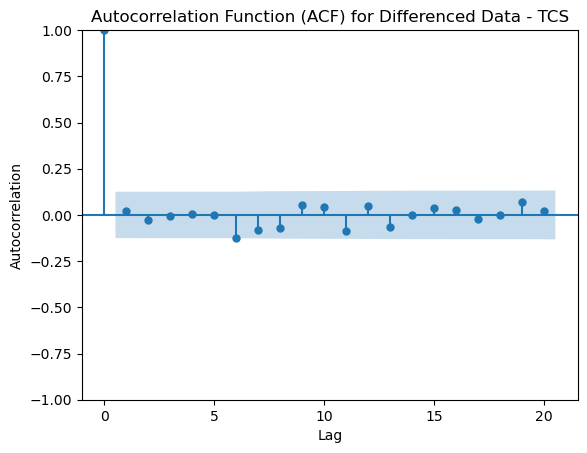

In [64]:
import numpy as np
# Plot the autocorrelation function (ACF) for the differenced data
plt.figure(figsize=(10, 6))
plot_acf(tcs_df['Close_diff'], lags=20, alpha=0.05)
plt.title('Autocorrelation Function (ACF) for Differenced Data - TCS')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


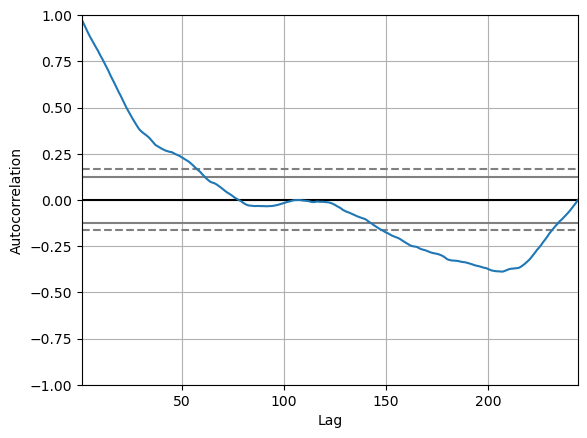

In [65]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

#  PACF

<Figure size 1200x600 with 0 Axes>

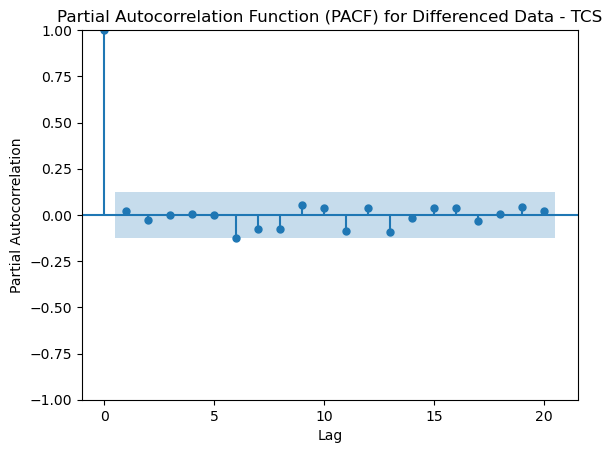

In [66]:

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(tcs_df['Close_diff'], lags=20, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) for Differenced Data - TCS')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


# Arima Model

In [120]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Fit ARIMA model
model = ARIMA(tcs_df['Close'], order=(1, 0, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  244
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1271.292
Date:                Sat, 11 May 2024   AIC                           2550.585
Time:                        12:56:06   BIC                           2564.573
Sample:                             0   HQIC                          2556.219
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3543.5299    199.911     17.726      0.000    3151.711    3935.349
ar.L1          0.9888      0.009    109.098      0.000       0.971       1.007
ma.L1          0.0341      0.071      0.478      0.6

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [121]:
# Forecast on the test dataset
forecast = model_fit.get_forecast(steps=30)

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [122]:
forecast

In [123]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(tcs_df) * 0.8)
train, test = tcs_df[0:train_size], tcs_df[train_size:len(df)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['Close'], order=(1, 0, 1))  # Replace 'Close' with your column name
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)



C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

In [124]:
# Drop NaN values from the test set and forecasted series
test = test.dropna()
test_forecast_series = test_forecast_series.dropna()

print("Length of true values:", len(test['Open']))
print("Length of forecasted values:", len(test_forecast_series))


Length of true values: 48
Length of forecasted values: 0


# Plot with Prediction


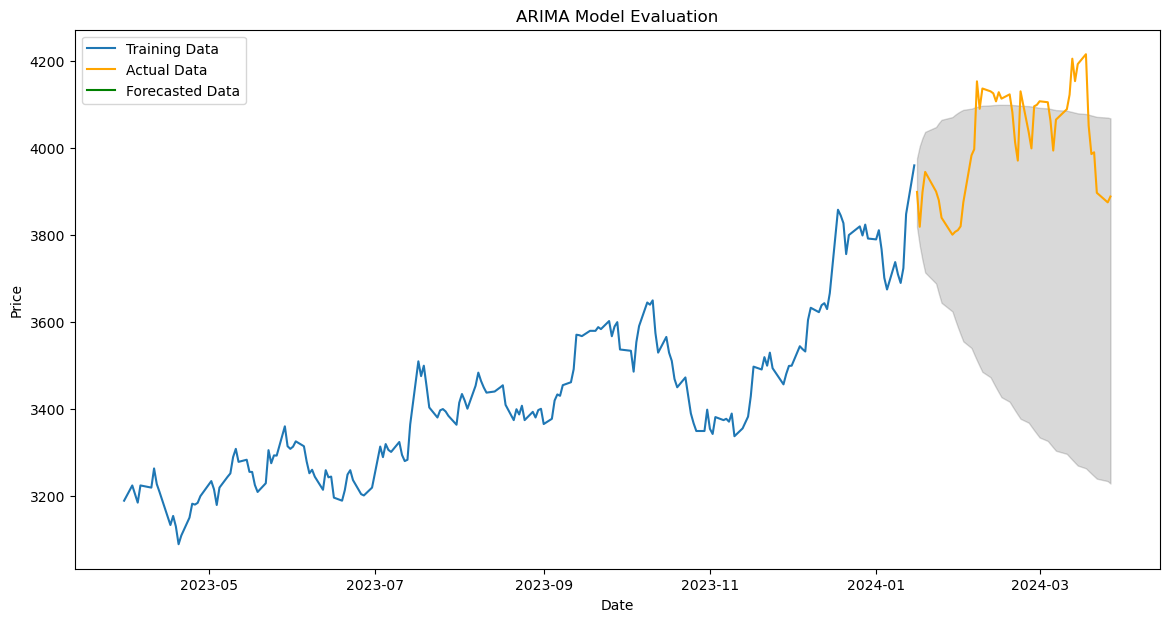

RMSE: 1394.279933628558


In [127]:

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['Open'], label='Training Data')  # Replace 'Close' with your column name
plt.plot(test['Open'], label='Actual Data', color='orange')  # Replace 'Close' with your column name
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print('RMSE:', rmse)

# Residuals

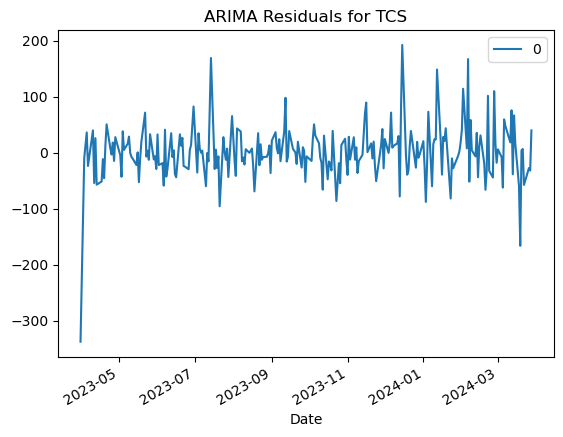

In [128]:

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA Residuals for TCS')
plt.show()


# Stock -4

In [87]:
zom_df = pd.read_csv('Datasets/ZOMATO.NS.csv')

In [88]:
zom_df

Date        Open        High         Low       Close   Adj Close  \
0    2023-03-29   50.250000   51.750000   49.599998   51.250000   51.250000   
1    2023-03-31   51.250000   51.700001   50.650002   51.000000   51.000000   
2    2023-04-03   51.500000   52.150002   50.900002   51.950001   51.950001   
3    2023-04-05   52.099998   52.900002   51.549999   51.700001   51.700001   
4    2023-04-06   51.750000   52.450001   51.299999   52.150002   52.150002   
..          ...         ...         ...         ...         ...         ...   
240  2024-03-21  168.000000  171.000000  166.399994  169.649994  169.649994   
241  2024-03-22  170.449997  174.899994  169.050003  174.199997  174.199997   
242  2024-03-26  173.399994  183.649994  172.199997  182.600006  182.600006   
243  2024-03-27  183.600006  189.000000  177.199997  179.449997  179.449997   
244  2024-03-28  179.800003  184.699997  176.000000  182.100006  182.100006   

       Volume  
0    41464387  
1    56566133  
2    29241512  
3    25497115  
4    19695678  
..        ...  
240  42227967  
241  41776494  
242  64590292  
243  50528769  
244  42567446  

[245 rows x 7 columns]

# Preliminary Analysis

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

zom_df['Date'] = pd.to_datetime(zom_df['Date'])
zom_df.set_index('Date', inplace=True)


In [90]:
df.isnull().sum().to_frame()


0
Open        0
High        0
Low         0
Close       0
Adj Close   0
Volume      0
Close_diff  0

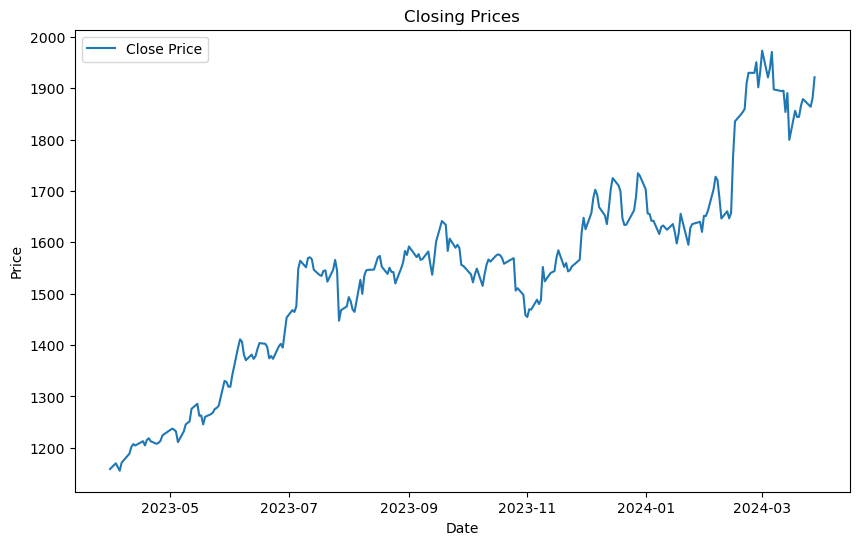

In [91]:
# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Test For Stationary

# Augmented Dickey-Fuller (ADF)

In [92]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(zom_df['Close'])

# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: 0.9997406458996214
p-value: 0.9942632113070751
Critical Values:
   1%: -3.458731141928624
   5%: -2.8740258764297293
   10%: -2.5734243167124093


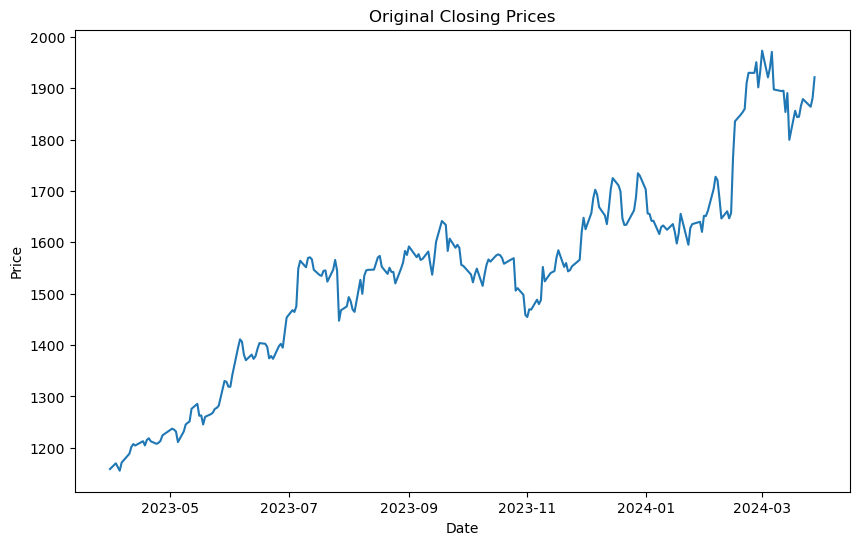

In [93]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Original Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


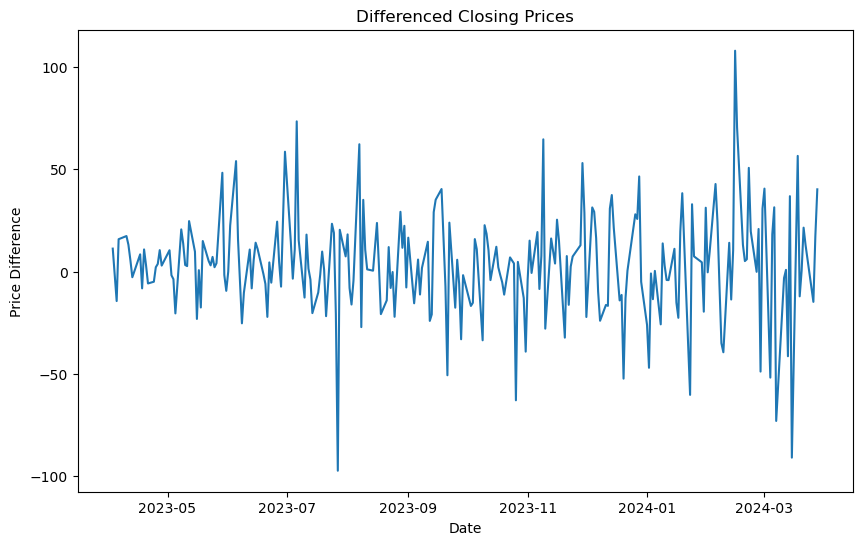

In [94]:

# Perform differencing to make the data stationary
df['Close_diff'] = df['Close'].diff()
df.dropna(inplace=True)

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(df['Close_diff'])
plt.title('Differenced Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()


In [95]:
zom_df.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-03-29  50.250000  51.750000  49.599998  51.250000  51.250000  41464387
2023-03-31  51.250000  51.700001  50.650002  51.000000  51.000000  56566133
2023-04-03  51.500000  52.150002  50.900002  51.950001  51.950001  29241512
2023-04-05  52.099998  52.900002  51.549999  51.700001  51.700001  25497115
2023-04-06  51.750000  52.450001  51.299999  52.150002  52.150002  19695678

In [96]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on the differenced data
result_diff = adfuller(df['Close_diff'])

# Extract and print test results
print('ADF Statistic (Differenced Data):', result_diff[0])
print('p-value (Differenced Data):', result_diff[1])


ADF Statistic (Differenced Data): -15.607494046438896
p-value (Differenced Data): 1.7970499397853128e-28


# ACF

<Figure size 1000x600 with 0 Axes>

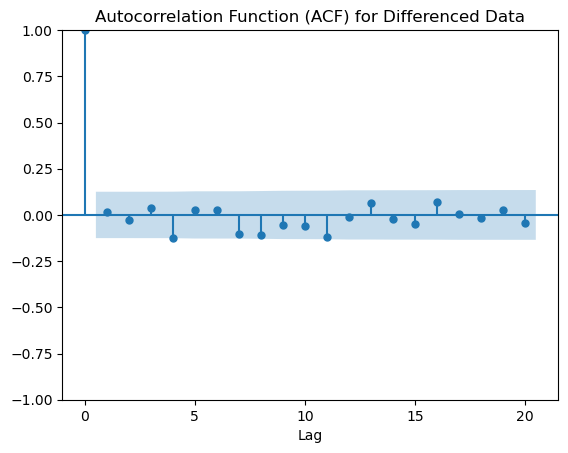

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming you have loaded your data into zom_df DataFrame

# Calculate the difference of 'Close' values to create 'Close_diff' column
zom_df['Close_diff'] = zom_df['Close'].diff()

# Plot the autocorrelation function (ACF) for the differenced data
plt.figure(figsize=(10, 6))
plot_acf(zom_df['Close_diff'].dropna(), lags=20, alpha=0.05)  # Drop NA values before plotting
plt.title('Autocorrelation Function (ACF) for Differenced Data')
plt.xlabel('Lag')
plt.show()


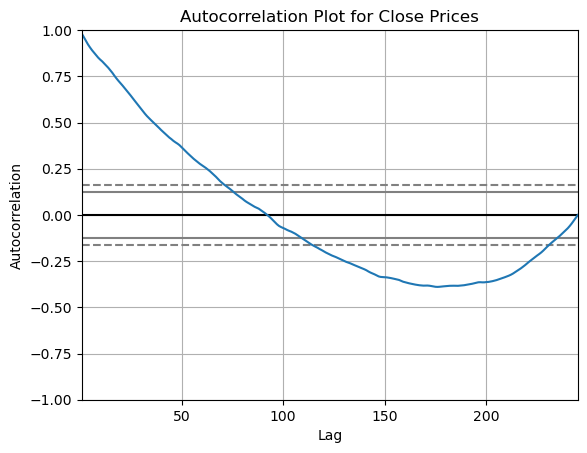

In [98]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(zom_df['Close'])
plt.title('Autocorrelation Plot for Close Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


# PACF Plot

<Figure size 1200x600 with 0 Axes>

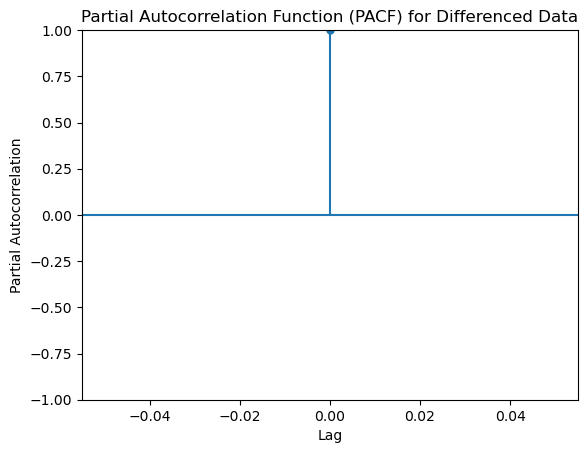

In [99]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(zom_df['Close_diff'], lags=20, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) for Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Arima Model

In [100]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [101]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(zom_df['Close'], order=(1, 0, 1))
model_fit = model.fit()


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [102]:

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  245
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -589.604
Date:                Sat, 11 May 2024   AIC                           1187.208
Time:                        12:55:14   BIC                           1201.213
Sample:                             0   HQIC                          1192.848
                                - 245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.8118     70.407      1.574      0.116     -27.184     248.807
ar.L1          0.9990      0.006    178.763      0.000       0.988       1.010
ma.L1          0.0546      0.051      1.068      0.2

# Forecasting

In [103]:
forecast = model_fit.get_forecast(steps=30)

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [104]:
forecast

In [105]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(zom_df) * 0.8)
train, test = zom_df[0:train_size], zom_df[train_size:len(df)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['Close'], order=(1, 0, 1))  # Replace 'Close' with your column name
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)



C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

In [106]:
# Drop NaN values from the test set and forecasted series
test = test.dropna()
test_forecast_series = test_forecast_series.dropna()

print("Length of true values:", len(test['Open']))
print("Length of forecasted values:", len(test_forecast_series))


Length of true values: 47
Length of forecasted values: 0


In [107]:
# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [108]:
test_forecast_series.head().to_frame()

predicted_mean
Date                      
2024-01-16             NaN
2024-01-17             NaN
2024-01-18             NaN
2024-01-19             NaN
2024-01-23             NaN

In [109]:
# Calculate the mean value of the forecasted series
mean_value = df['Close'].mean()

# Fill NaN values with the mean value
test_forecast_series = test_forecast_series.fillna(mean_value)


In [110]:
test_forecast_series.head().to_frame()

predicted_mean
Date                      
2024-01-16     1546.610494
2024-01-17     1546.610494
2024-01-18     1546.610494
2024-01-19     1546.610494
2024-01-23     1546.610494

In [111]:
# Calculate the mean squared error
mse = mean_squared_error(test['Open'], test_forecast_series[:len(test)])  # Use the length of the test set
rmse = mse**0.5

# Print RMSE
print('RMSE:', rmse)


RMSE: 1394.279933628558


# Plot with Prediction

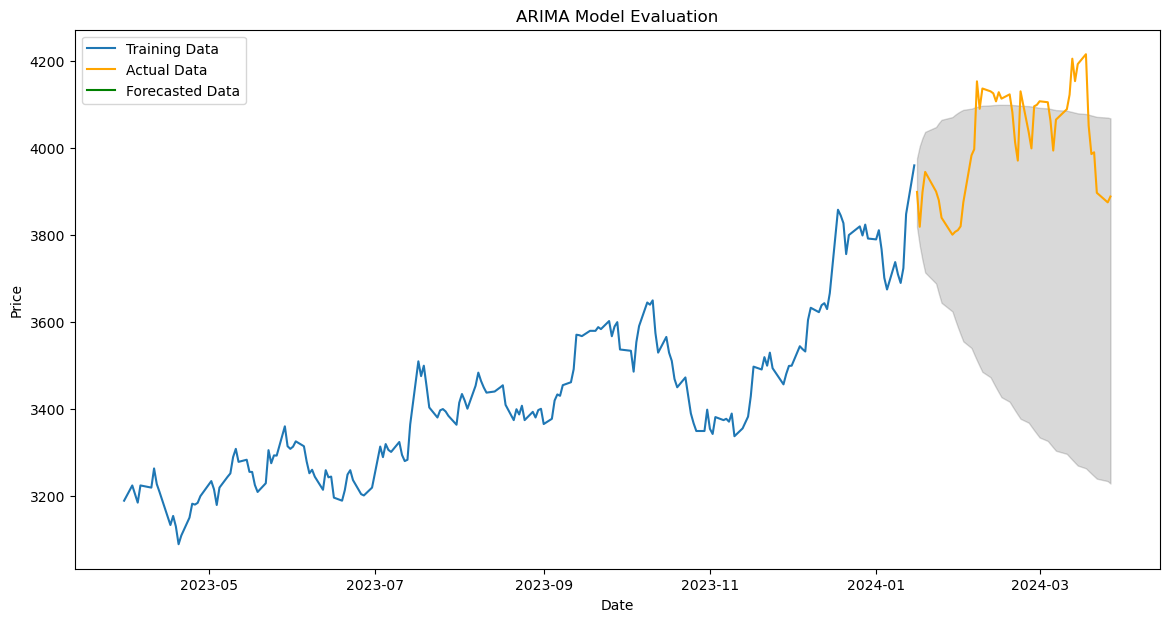

RMSE: 1394.279933628558


In [129]:

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['Open'], label='Training Data')  # Replace 'Close' with your column name
plt.plot(test['Open'], label='Actual Data', color='orange')  # Replace 'Close' with your column name
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print('RMSE:', rmse)

# Residual Plot 

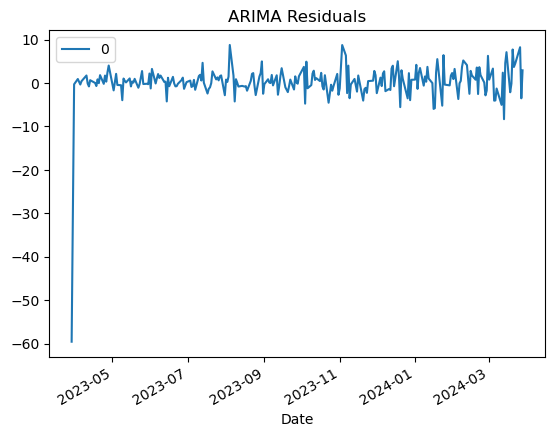

In [113]:

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA Residuals')
plt.show()